In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('data/flights_sample_3m.csv')

In [7]:
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [8]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

In [9]:
df['DATE_OF_YEAR'] = df['FL_DATE'].dt.day_of_year

In [10]:
df.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT', 'DATE_OF_YEAR'],
      dtype='object')

In [11]:
import pandas as pd
import numpy as np

# Work on a copy to avoid SettingWithCopyWarning
df1 = df[['AIRLINE', 'ORIGIN', 'DEST', 'CANCELLED', 'DATE_OF_YEAR', 'CRS_DEP_TIME']].copy()

df1

,AIRLINE,ORIGIN,DEST,CANCELLED,DATE_OF_YEAR,CRS_DEP_TIME
0,United Air Lines Inc.,FLL,EWR,0.0,9,1155
1,Delta Air Lines Inc.,MSP,SEA,0.0,323,2120
2,United Air Lines Inc.,DEN,MSP,0.0,203,954
3,Delta Air Lines Inc.,MSP,SFO,0.0,65,1609
4,Spirit Air Lines,MCO,DFW,0.0,54,1840
...,...,...,...,...,...,...
2999995,American Airlines Inc.,JAX,CLT,0.0,317,1742
2999996,American Airlines Inc.,ORD,AUS,0.0,306,1300
2999997,Delta Air Lines Inc.,HSV,ATL,0.0,254,534
2999998,Republic Airline,BOS,LGA,0.0,317,1600


In [12]:
df1['CANCELLED'] = df1['CANCELLED'].astype(int)

In [13]:
df1.reset_index(drop=True, inplace=True)

In [14]:
# Encode categorical variables (Label Encoding)
from sklearn.preprocessing import LabelEncoder

for col in ['AIRLINE', 'ORIGIN', 'DEST']:
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col])
    df1[col] = df1[col].astype(int)

In [15]:
df1

,AIRLINE,ORIGIN,DEST,CANCELLED,DATE_OF_YEAR,CRS_DEP_TIME
0,17,131,123,0,9,1155
1,3,247,323,0,323,2120
2,17,99,247,0,203,954
3,3,247,325,0,65,1609
4,16,223,100,0,54,1840
...,...,...,...,...,...,...
2999995,2,189,77,0,317,1742
2999996,2,261,26,0,306,1300
2999997,3,167,23,0,254,534
2999998,13,49,210,0,317,1600


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
X = pd.get_dummies(df1[['AIRLINE', 'ORIGIN', 'DEST','DATE_OF_YEAR','CRS_DEP_TIME']], drop_first=True)
y = df1['CANCELLED']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

In [23]:
!pip install xgboost

  Using cached xgboost-3.0.3-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.3-py3-none-win_amd64.whl (149.9 MB)


In [24]:
from xgboost import XGBClassifier

In [32]:
from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE().fit_resample(X_train, y_train)
xgb = XGBClassifier(
                    max_depth=6,
                    learning_rate=0.05,
                    random_state=42,
                    use_label_encoder=False,
                    n_estimators=300,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    eval_metric='logloss')
xgb.fit(X_res, y_res)

c:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:58:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [33]:
y_pred = xgb.predict(X_test)

In [35]:
y_probs = model.predict_proba(X_test)[:, 1]

# Adjust threshold here (try 0.6, 0.7, 0.8)
y_pred_adjusted = (y_probs > 0.6).astype(int)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_adjusted))
print(classification_report(y_test, y_pred_adjusted))

[[1018987  149415]
 [  27083    4515]]
              precision    recall  f1-score   support

           0       0.97      0.87      0.92   1168402
           1       0.03      0.14      0.05     31598

    accuracy                           0.85   1200000
   macro avg       0.50      0.51      0.48   1200000
weighted avg       0.95      0.85      0.90   1200000



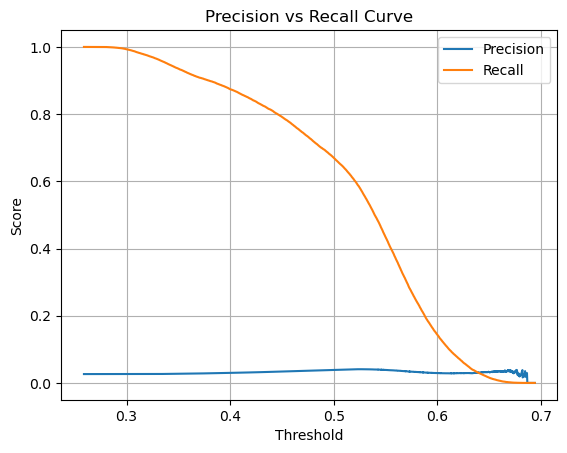

In [36]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision vs Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


In [39]:
y_pred_05 = (y_probs > 0.55).astype(int)
print(confusion_matrix(y_test, y_pred_05))
print(classification_report(y_test, y_pred_05))

[[827022 341380]
 [ 17894  13704]]
              precision    recall  f1-score   support

           0       0.98      0.71      0.82   1168402
           1       0.04      0.43      0.07     31598

    accuracy                           0.70   1200000
   macro avg       0.51      0.57      0.45   1200000
weighted avg       0.95      0.70      0.80   1200000



In [41]:
y_pred_05 = (y_probs > 0.64).astype(int)
print(confusion_matrix(y_test, y_pred_05))
print(classification_report(y_test, y_pred_05))

[[1138850   29552]
 [  30658     940]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97   1168402
           1       0.03      0.03      0.03     31598

    accuracy                           0.95   1200000
   macro avg       0.50      0.50      0.50   1200000
weighted avg       0.95      0.95      0.95   1200000



In [74]:
# Make probability prediction using the trained XGBoost model
probability = xgb.predict_proba(random_flight_features)

# The probability for class 1 (cancelled) will be at index 1
cancelled_probability = probability[0][1]

# Display the chance of cancellation
print(f"Chance of cancellation: {cancelled_probability * 100:.2f}%")

Chance of cancellation: 51.25%
